In [ ]:
#RUN THIS LINE OF CODE IF pd.read_sql_query DOES NOT WORK
#!pip install pandas==0.24.2

In [1]:
import pandas as pd
print(pd.__version__)

0.24.2


In [44]:
from sqlalchemy import create_engine
import getpass 
import psycopg2
import helper_functions as hp
from datetime import datetime
import matplotlib.pyplot as plt

In [45]:
db_string = "postgres://MONEYDB:{}@moneydb.cpbpjwbxydzi.us-east-2.rds.amazonaws.com:5432/postgres".format(getpass.getpass())

db = create_engine(db_string)

········


In [96]:
query = """

select * from public."Upward_Trends_Curr"
where "Day"= '1 Days Ago'
order by "MACD" desc

"""

In [97]:


fr = pd.read_sql_query(query,con=db)
fr

,index,Date,ticker,MACD,signal,Close,Upward,Day,DailyVariance,Daily_Volatility,Annualized_Volatility
0,7,2020-07-09,OFLX,0.406816,0.047095,109.999901,1,1 Days Ago,0.002151,0.046377,0.733284
1,14,2020-07-09,ZBRA,0.353039,0.374517,261.984985,1,1 Days Ago,0.000754,0.027454,0.434082
2,13,2020-07-09,VRSN,0.215804,-0.647195,212.100006,1,1 Days Ago,0.000197,0.014048,0.222119
3,6,2020-07-09,MOMO,0.100142,-0.322475,21.315001,1,1 Days Ago,0.001764,0.042005,0.664150
4,1,2020-07-09,BLUE,0.062529,-0.259403,66.849998,1,1 Days Ago,0.001299,0.036042,0.569882
5,0,2020-07-09,BGFV,0.050258,0.024064,2.620000,1,1 Days Ago,0.007971,0.089281,1.411652
6,4,2020-07-09,ENTG,0.033326,0.038715,60.529999,1,1 Days Ago,0.000570,0.023871,0.377435
7,5,2020-07-09,INFI,0.017435,-0.005226,1.160000,1,1 Days Ago,0.002099,0.045812,0.724350
8,11,2020-07-09,TCX,0.014202,-0.179470,58.779999,1,1 Days Ago,0.000647,0.025438,0.402208
9,2,2020-07-09,CCXI,0.014069,-0.329179,60.529999,1,1 Days Ago,0.001441,0.037966,0.600291


##### 26 Days vs 12 Day MA (When 12 day moves above the 26 day, this indicates an upward trend signal)

In [102]:
ticker = 'OXLC'

In [103]:



SDOW_q = """

select * from public."All_Prices_Full"
where ticker = '{}'

""".format(ticker)

In [104]:

SDOW = pd.read_sql_query(SDOW_q,con=db)



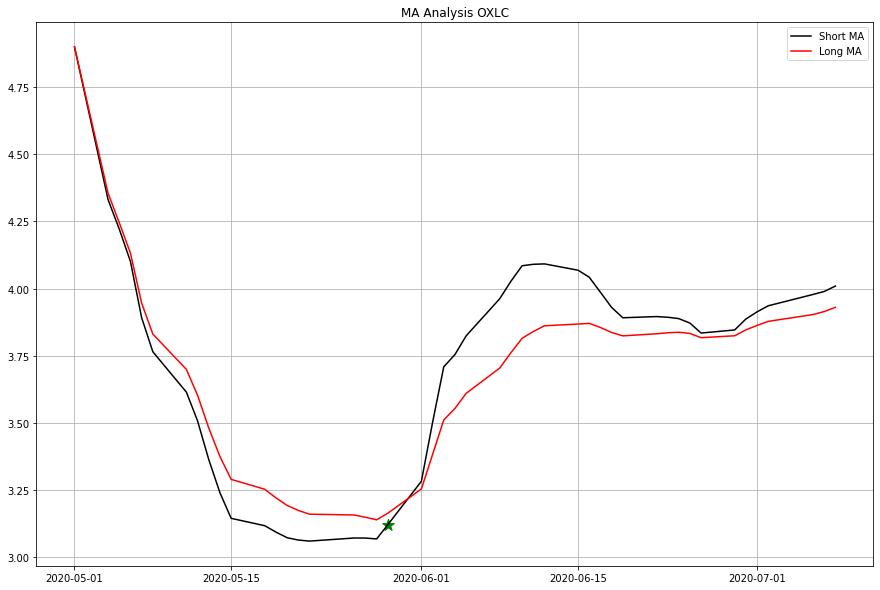

In [105]:




plt.figure(figsize=(15,10))
plt.plot(SDOW['Date'],SDOW['12Day_Moving_Average_Close'],label='Short MA',color='k')
plt.plot(SDOW['Date'],SDOW['26Day_Moving_Average_Close'],label='Long MA',color='r')


for values in range(len(SDOW)):
    if values!=0:
        if SDOW['MACD'].iloc[values]<0:
            if SDOW['MACD'].iloc[values-1]>0:
                plt.scatter(SDOW['Date'].iloc[values-1],SDOW['12Day_Moving_Average_Close'].iloc[values-1],marker='*',
                       color='red',s=150)
                
    if SDOW['MACD'].iloc[values]>=0:
        if SDOW['MACD'].iloc[values-1]<0:
            plt.scatter(SDOW['Date'].iloc[values-1],SDOW['12Day_Moving_Average_Close'].iloc[values-1],marker='*',
                       color='green',s=150)
            
            
plt.title('MA Analysis {}'.format(ticker))
plt.grid()
plt.legend()
plt.show()

##### When the blue line ocilates above the zero line, this indicates that the short term MA is above the long term MA....BUY signal.
##### When the blue line ocilates below the zero line, this indicates that the short term MA is below the long term MA....SELL signal.

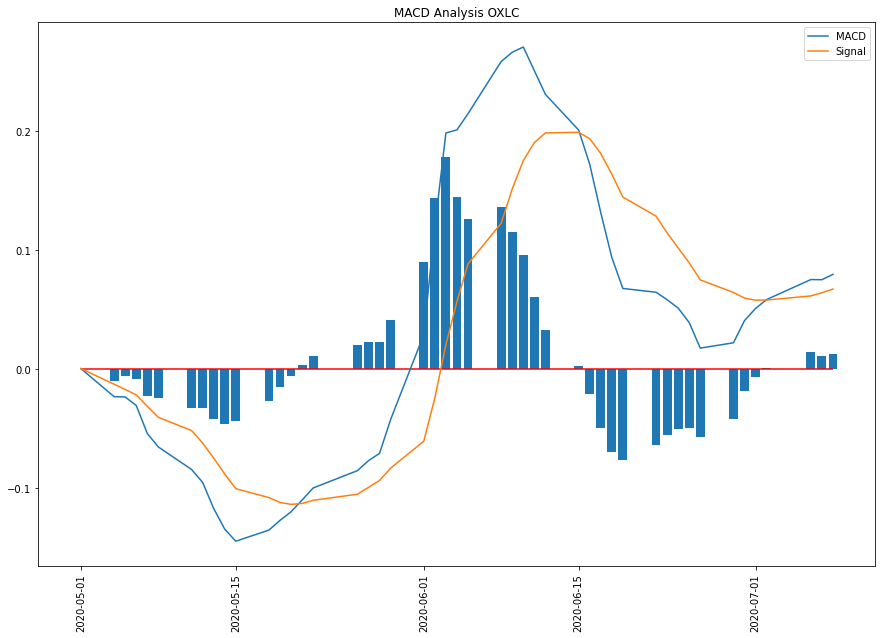

In [106]:
plt.figure(figsize=(15,10))
plt.title('MACD Analysis {}'.format(ticker))
plt.plot(SDOW['Date'],SDOW['MACD'],label='MACD')
plt.plot(SDOW['Date'],SDOW['signal'],label='Signal')
plt.hlines(0,SDOW['Date'].min(),SDOW['Date'].max(),'r')
plt.bar(SDOW['Date'],SDOW['hist'])
plt.legend()
plt.xticks(rotation=90)
plt.show()